<a href="https://colab.research.google.com/github/MuizSarwar/learnML/blob/main/(Simple)Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#creat a simple toy dataset
hours_studied = np.array([2,3,4,5,7,9,10,3,4])
pass_exam = np.array([0,0,1,1,1,1,1,0,1])

df = pd.DataFrame({'hours_studied':hours_studied, 'pass_exam':pass_exam})
df

,hours_studied,pass_exam
0,2,0
1,3,0
2,4,1
3,5,1
4,7,1
5,9,1
6,10,1
7,3,0
8,4,1


In [3]:
#creat model and fit the model and find intercept and coefficient
model = LogisticRegression()
model.fit(df[['hours_studied']],df['pass_exam'])

print(f"Intercept: {model.intercept_}") #compare it with bais
print(f"Coefficient: {model.coef_}")  #compare it with weight

Intercept: [-4.17792337]
Coefficient: [[1.19772524]]


In [4]:
#Predict probability for a range of study hours:
hours_grid = np.linspace(0,10,150)  # this will a list of 150 elements each between 0 to 10
df_grid = pd.DataFrame({'hours_studied':hours_grid})
pass_prob = model.predict_proba(df_grid[["hours_studied"]])[:, 1]
pass_prob

array([0.01509884, 0.01634201, 0.0176857 , 0.01913772, 0.02070645,
       0.02240082, 0.02423041, 0.02620543, 0.02833676, 0.03063598,
       0.03311539, 0.03578806, 0.03866781, 0.04176925, 0.04510777,
       0.04869957, 0.05256163, 0.05671171, 0.06116831, 0.06595064,
       0.07107856, 0.0765725 , 0.08245341, 0.08874257, 0.09546153,
       0.10263191, 0.11027521, 0.11841262, 0.12706476, 0.13625137,
       0.14599109, 0.15630105, 0.16719655, 0.17869071, 0.19079402,
       0.20351399, 0.21685472, 0.23081654, 0.24539559, 0.26058353,
       0.27636721, 0.29272844, 0.30964379, 0.32708458, 0.34501676,
       0.36340115, 0.38219353, 0.40134504, 0.42080257, 0.44050928,
       0.46040529, 0.48042827, 0.50051433, 0.52059873, 0.54061676,
       0.56050456, 0.58019996, 0.59964317, 0.61877755, 0.6375502 ,
       0.65591247, 0.67382041, 0.69123508, 0.70812273, 0.72445491,
       0.7402085 , 0.75536555, 0.76991317, 0.78384325, 0.79715217,
       0.80984044, 0.82191236, 0.83337559, 0.84424079, 0.85452

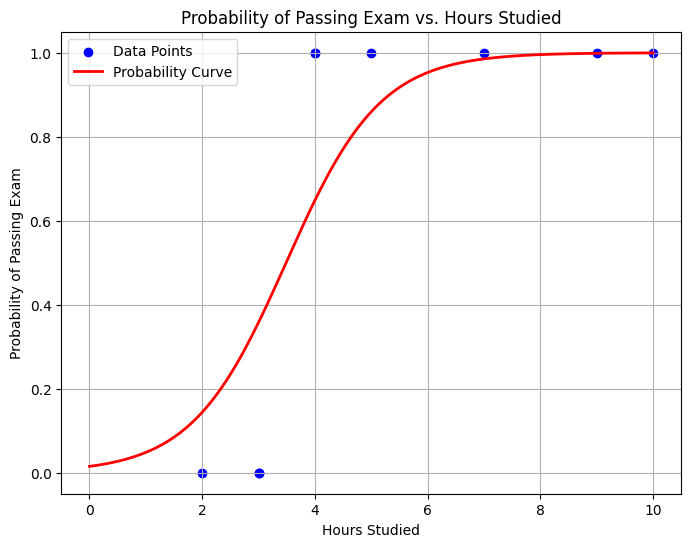

In [5]:
#PLot datapoint and probability curve:
plt.figure(figsize=(8, 6))
plt.scatter(df['hours_studied'], df['pass_exam'], color='blue', label='Data Points')
plt.plot(df_grid['hours_studied'], pass_prob, color='red', linewidth=2, label='Probability Curve')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing Exam')
plt.title('Probability of Passing Exam vs. Hours Studied')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Predict for a Example of some students
example_hours = np.array([[2],[4],[6],[8]])
example_pass_prob = model.predict_proba(example_hours)[:, 1]
example_pred_class = model.predict(example_hours)

example_result_df = pd.DataFrame(
    {
        'Hours_Studied': example_hours.flatten(),
        'Probability_of_Passing': example_pass_prob,
        'Predicted_Class': example_pred_class
    }
)

example_result_df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Hours_Studied,Probability_of_Passing,Predicted_Class
0,2,0.143998,0
1,4,0.648620,1
2,6,0.952953,1
3,8,0.995521,1


In [7]:
#load data from dataset and create DataFrame:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
#Train Test Split and scaled :
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#Train Logistic regression on the scaled data
clf = LogisticRegression(max_iter=100)
clf.fit(X_train_scaled, y_train)
y_test_pred = clf.predict(X_test_scaled)
y_test_proba = clf.predict_proba(X_test_scaled)[:, 1]

print(f"Models Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")

Models Accuracy: 0.974


In [10]:
#Confusion matrix and classifiction report :
cm = confusion_matrix(y_test, y_test_pred)
c_report = classification_report(y_test,y_test_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"\nClassification Report:\n{c_report}")
#

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 800x600 with 0 Axes>

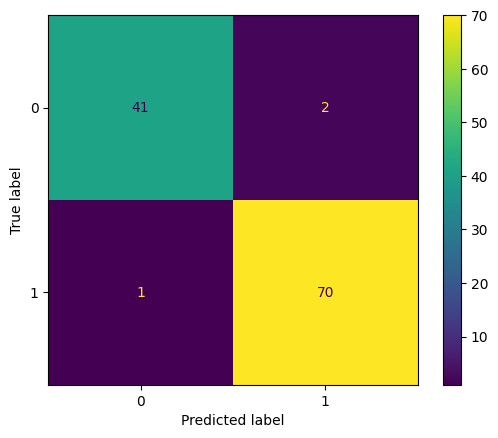

In [11]:
#confusion matrix visualization :
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred
)
plt.show()


In [12]:
#Basic matrics at default threshold (0.5)
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.974
Precision: 0.972
Recall: 0.986
F1 Score: 0.979


In [13]:
#Try different threshold
thresholds = np.linspace(0.1,0.9,9)
rows = []
for thresh in thresholds:
  acc = accuracy_score(y_test, y_test_proba >= thresh)
  prec = precision_score(y_test, y_test_proba >= thresh)
  rec = recall_score(y_test, y_test_proba >= thresh)
  f1 = f1_score(y_test, y_test_proba >= thresh)
  rows.append([thresh, acc, prec, rec, f1])

df_metrics = pd.DataFrame(rows, columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_metrics


,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.1,0.956140,0.934211,1.000000,0.965986
1,0.2,0.973684,0.959459,1.000000,0.979310
2,0.3,0.982456,0.972603,1.000000,0.986111
3,0.4,0.982456,0.972603,1.000000,0.986111
4,0.5,0.973684,0.972222,0.985915,0.979021
5,0.6,0.982456,0.985915,0.985915,0.985915
6,0.7,0.956140,0.985294,0.943662,0.964029
7,0.8,0.956140,0.985294,0.943662,0.964029
8,0.9,0.929825,0.984615,0.901408,0.941176


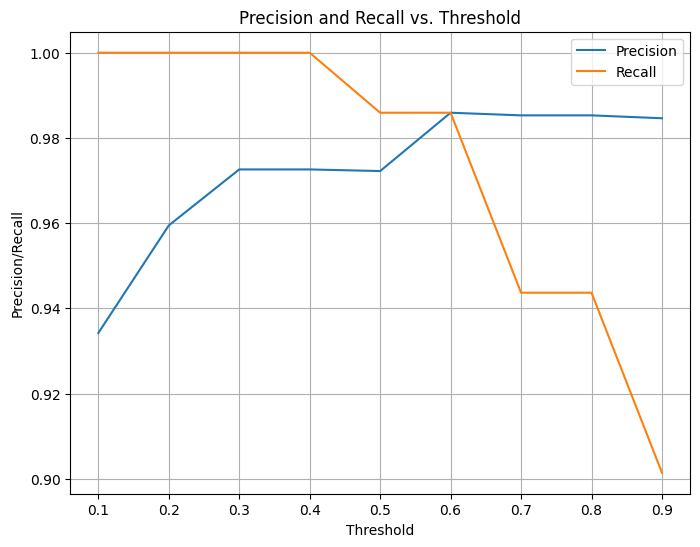

In [14]:
#Prescision and Recall vs threshold graph :
plt.figure(figsize=(8, 6))
plt.plot(thresholds, df_metrics['Precision'], label='Precision')
plt.plot(thresholds, df_metrics['Recall'], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#L2 regularization :
clf_strong = LogisticRegression(penalty='l2', C=1000.0)
clf_weak = LogisticRegression(penalty='l2', C=0.01)


clf_strong.fit(X_train_scaled, y_train)
clf_weak.fit(X_train_scaled, y_train)

y_pred_weak = clf_weak.predict(X_test_scaled)
y_pred_strong = clf_strong.predict(X_test_scaled)

In [18]:
#Compare coefficient magnitudes:
coef_weak = clf_weak.coef_[0]
coef_strong = clf_strong.coef_[0]

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (Weak)': coef_weak,
    'Coefficient (Strong)': coef_strong
})

coef_df.head()

,Feature,Coefficient (Weak),Coefficient (Strong)
0,mean radius,-0.207840,3.744056
1,mean texture,-0.183925,-5.140148
2,mean perimeter,-0.206185,7.213172
3,mean area,-0.192726,-2.144036
4,mean smoothness,-0.091815,1.591682


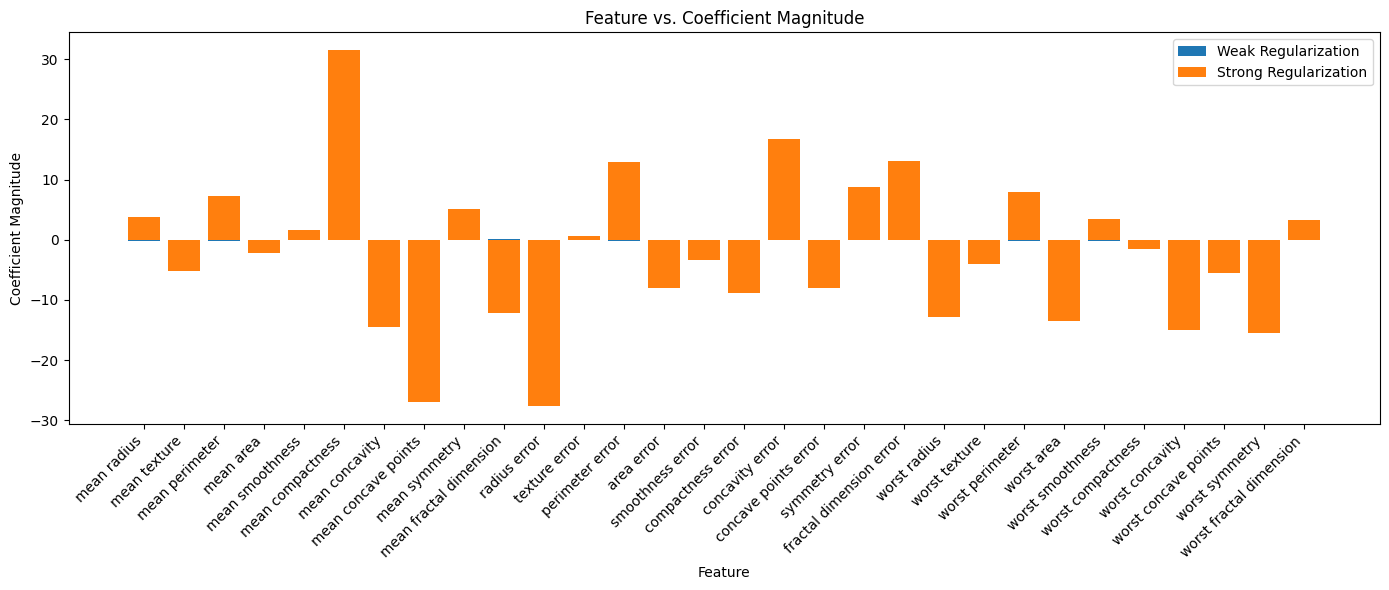

In [22]:
#visualization of feature vs coefficient :
plt.figure(figsize=(14, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient (Weak)'], label='Weak Regularization')
plt.bar(coef_df['Feature'], coef_df['Coefficient (Strong)'], label='Strong Regularization')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature vs. Coefficient Magnitude')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()